IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Model 1 - TreeEnsemble:


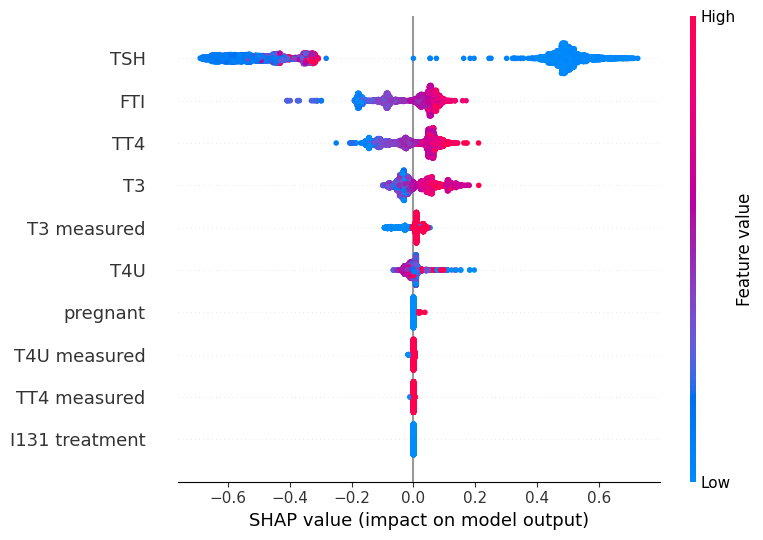

Model 2 - TreeEnsemble:


The figure layout has changed to tight
The figure layout has changed to tight


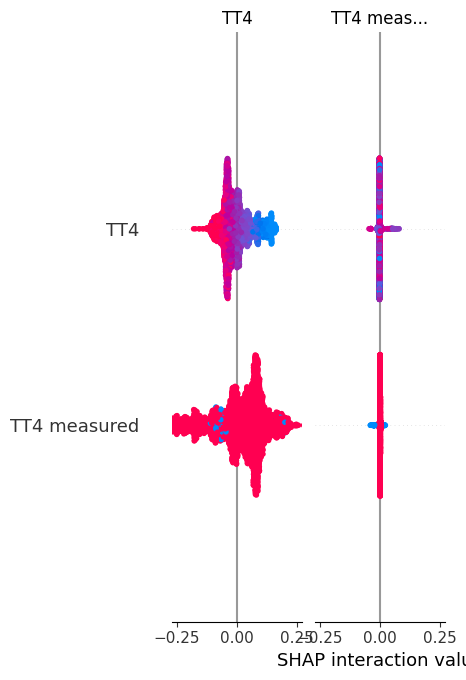

Model 3 - TreeEnsemble:


The figure layout has changed to tight
The figure layout has changed to tight


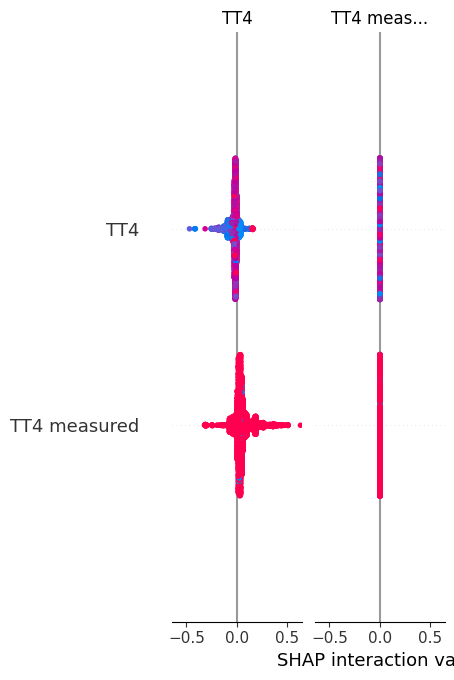

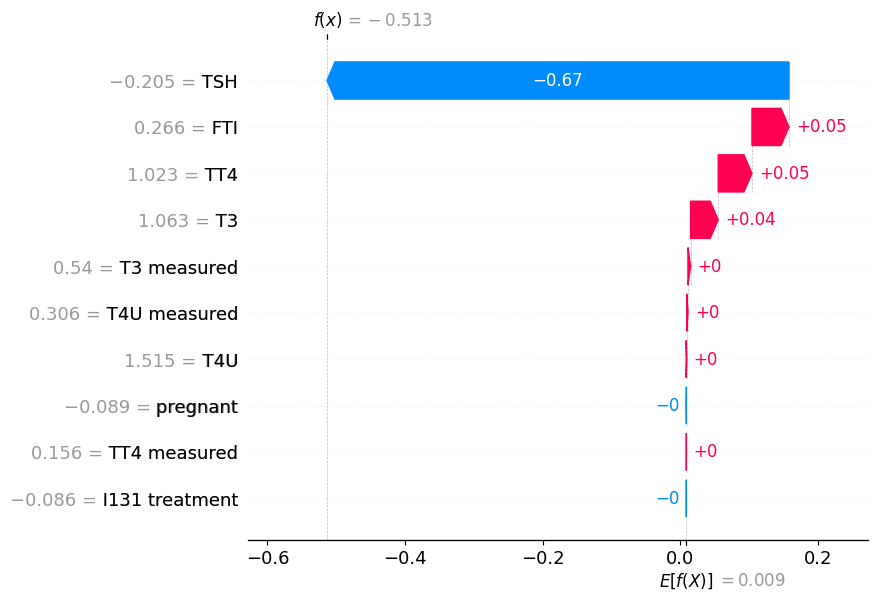

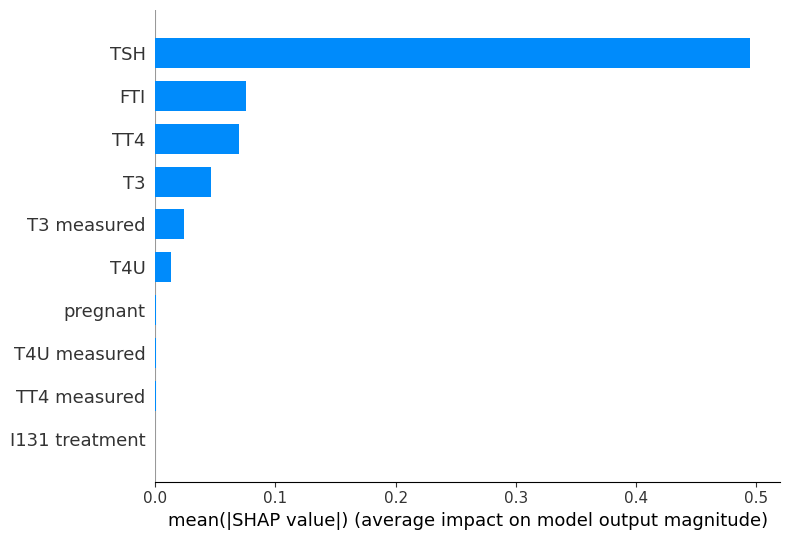

In [1]:
import joblib
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Ajuste o tamanho da fonte
plt.rcParams.update({'font.size': 10})

# Carregue o modelo de empilhamento
stacking_model = joblib.load('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\models_file\\StackingModel.sav')

# Dados de teste a partir do arquivo CSV
X_train = pd.read_csv('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\datasets\\hypothyroid\\input_train.csv')

# Obtenha os modelos base do empilhamento
base_models = stacking_model.estimators_

# Crie um explainer para cada modelo base
explainers = [shap.Explainer(model) for model in base_models]

# Calcule os valores SHAP para cada modelo base
shap_values = [explainer(X_train) for explainer in explainers]

for i, explainer in enumerate(explainers):
    print(f"Model {i+1} - {type(explainer.model).__name__}:")
    shap.summary_plot(shap_values[i], X_train, feature_names=X_train.columns, show=False)
    plt.show()
shap.plots.waterfall(shap_values[0][0])
plt.show()
shap.summary_plot(shap_values[0], X_train, feature_names=X_train.columns, plot_type='bar', show=False)
plt.show()

